In [2]:
# import module written for processing our gene mapping to gene ID, filter with e-value, pident
from network_analysis.map_string_to_ID import *

# node_path referes to diamond blastp --in REPRESENTING GENE --db string.dmnd
node_path = '/home/hermuba/data0118/map_to_exist_net/ec70_string'
node = read_node_to_df(node_path)
node.drop_duplicates(subset = ['sseqid'], inplace = True)
node.set_index('sseqid', inplace = True)


# select nodes with high bitscore with string 511145 proteins
selected_nodes = filter_node(node)

# read the edge
edge_path = '/home/hermuba/data0118/map_to_exist_net/511145.protein.links.full.v11.0.txt'
edge = pd.read_csv(edge_path, sep = ' ')


# select edge with experiments != 0
#edge = edge.loc[edge['experiments']>0]


# filter edge with both representing genes
output_path = '/home/hermuba/data0118/map_to_exist_net/string_rm_plasmid'
selected_edge = map_string_to_repr(edge, selected_nodes, output_path)


In [3]:
selected_edge.shape

(582078, 16)

In [4]:
from Genome.goldstandard_pair.lls import *
gd = '/home/hermuba/data0118/goldstandard/tf_intersect_GO_rm_plasmidGO.smpl'
net = '/home/hermuba/data0118/map_to_exist_net/string_rm_plasmid' #ID has problem

In [5]:
gold = read_gold(gd)
all_chunks = read_net_by_chunk(net)
all_chunk = merge_net_with_all_chunks(gold,all_chunks, 'string')

In [6]:
all_chunk.shape

(4540, 17)

In [7]:

all_chunk.to_csv('~/data0118/joined_smpl/string_GO_smpl_rm_plasmid')

Text(0.5, 0, 'bins')

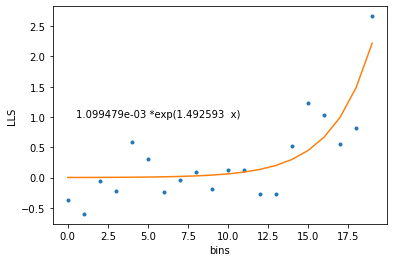

In [9]:
lls_score = lls_for_other(all_chunk, 'combined_score', bins = 20)
top_bins = 8
subset = lls_score.copy()

smallest_nonneg = subset[subset>0].min()
subset.loc[subset<0] = smallest_nonneg
y = subset.values
x = np.array(range(len(y)))
import numpy as np

new = np.polyfit(x[-top_bins:], np.log(y[-top_bins:]), 1) #y = Ae*bx

import matplotlib.pyplot as plt
plt.plot(lls_score, '.')
plt.plot(np.exp(new[1]) * np.exp(new[0]*np.array(x)))
plt.text(0.5, 1, '{0:e} *exp({1:2f}  x)'.format(np.exp(new[1]), np.exp(new[0])))
plt.ylabel('LLS')
plt.xlabel('bins')

In [11]:
def fitting_LLS_exp(all_chunk, bins = 250, lls_function = lls_for_other, score = 'mutual_info', top_bins = 175):

    
    lls_score = lls_function(all_chunk, score, bins = bins)

    # new method, exponential
    subset = lls_score.copy()

    # exp can't have <=0 zero values
    smallest_nonneg = subset[subset>0].min()
    subset.loc[subset<0] = smallest_nonneg
    y = subset.values
    x = np.array(range(len(y)))

    
    
    
    expo_param = np.polyfit(x[-top_bins:], np.log(y[-top_bins:]), 1) #y = Ae*bx
    fitted = np.exp(expo_param[1]) * np.exp(expo_param[0]*np.array(x))
    
    fitted_lls = pd.Series(fitted, index = lls_score.index)
    return fitted_lls


In [16]:
new_lls = fitting_LLS_exp(all_chunk, bins = 20, lls_function = lls_for_other, score = 'combined_score', top_bins = 8)
net = '/home/hermuba/data0118/map_to_exist_net/string_rm_plasmid' 
output = '/home/hermuba/data0118/network1122/string_lls_rm_plasmid_edgelist'
# map LLS_reg back to each "whole" network
map_lls_to_whole_data(net, new_lls, 'combined_score', output, 'string', lls_thres = 1) # use mutual info


at 0 chunk, we have 1740 edges with lls > 1


/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


done with string
